<a href="https://colab.research.google.com/github/ranaurek/CHSH-Game-Quantum-Strategy/blob/main/CHSH_Game_Quantum_Strategy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install qiskit

In [2]:
from qiskit import *
from qiskit.visualization import plot_state_city
from math import pi, sqrt
from numpy.random import randint

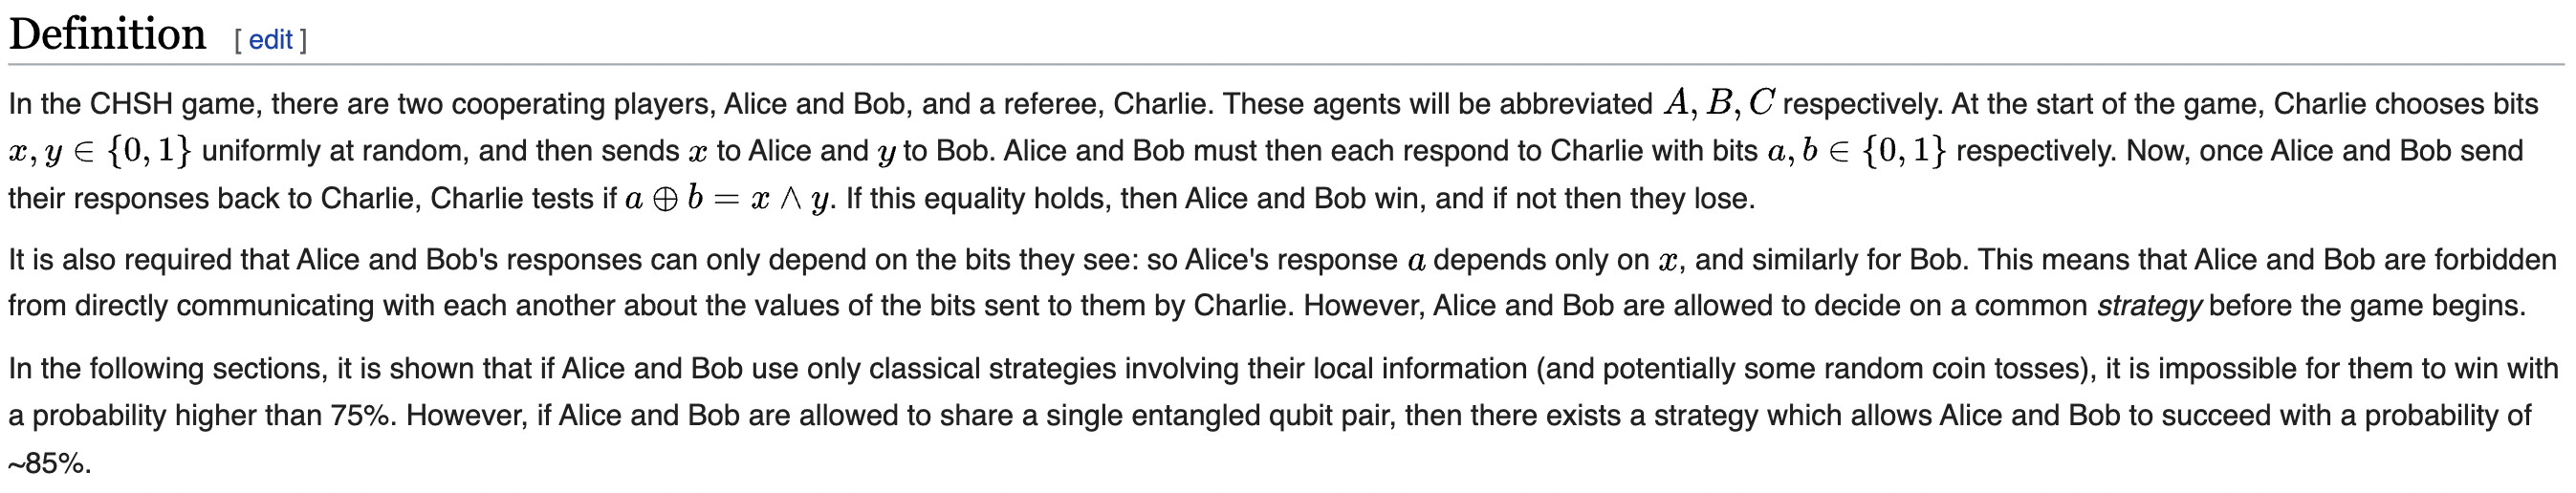

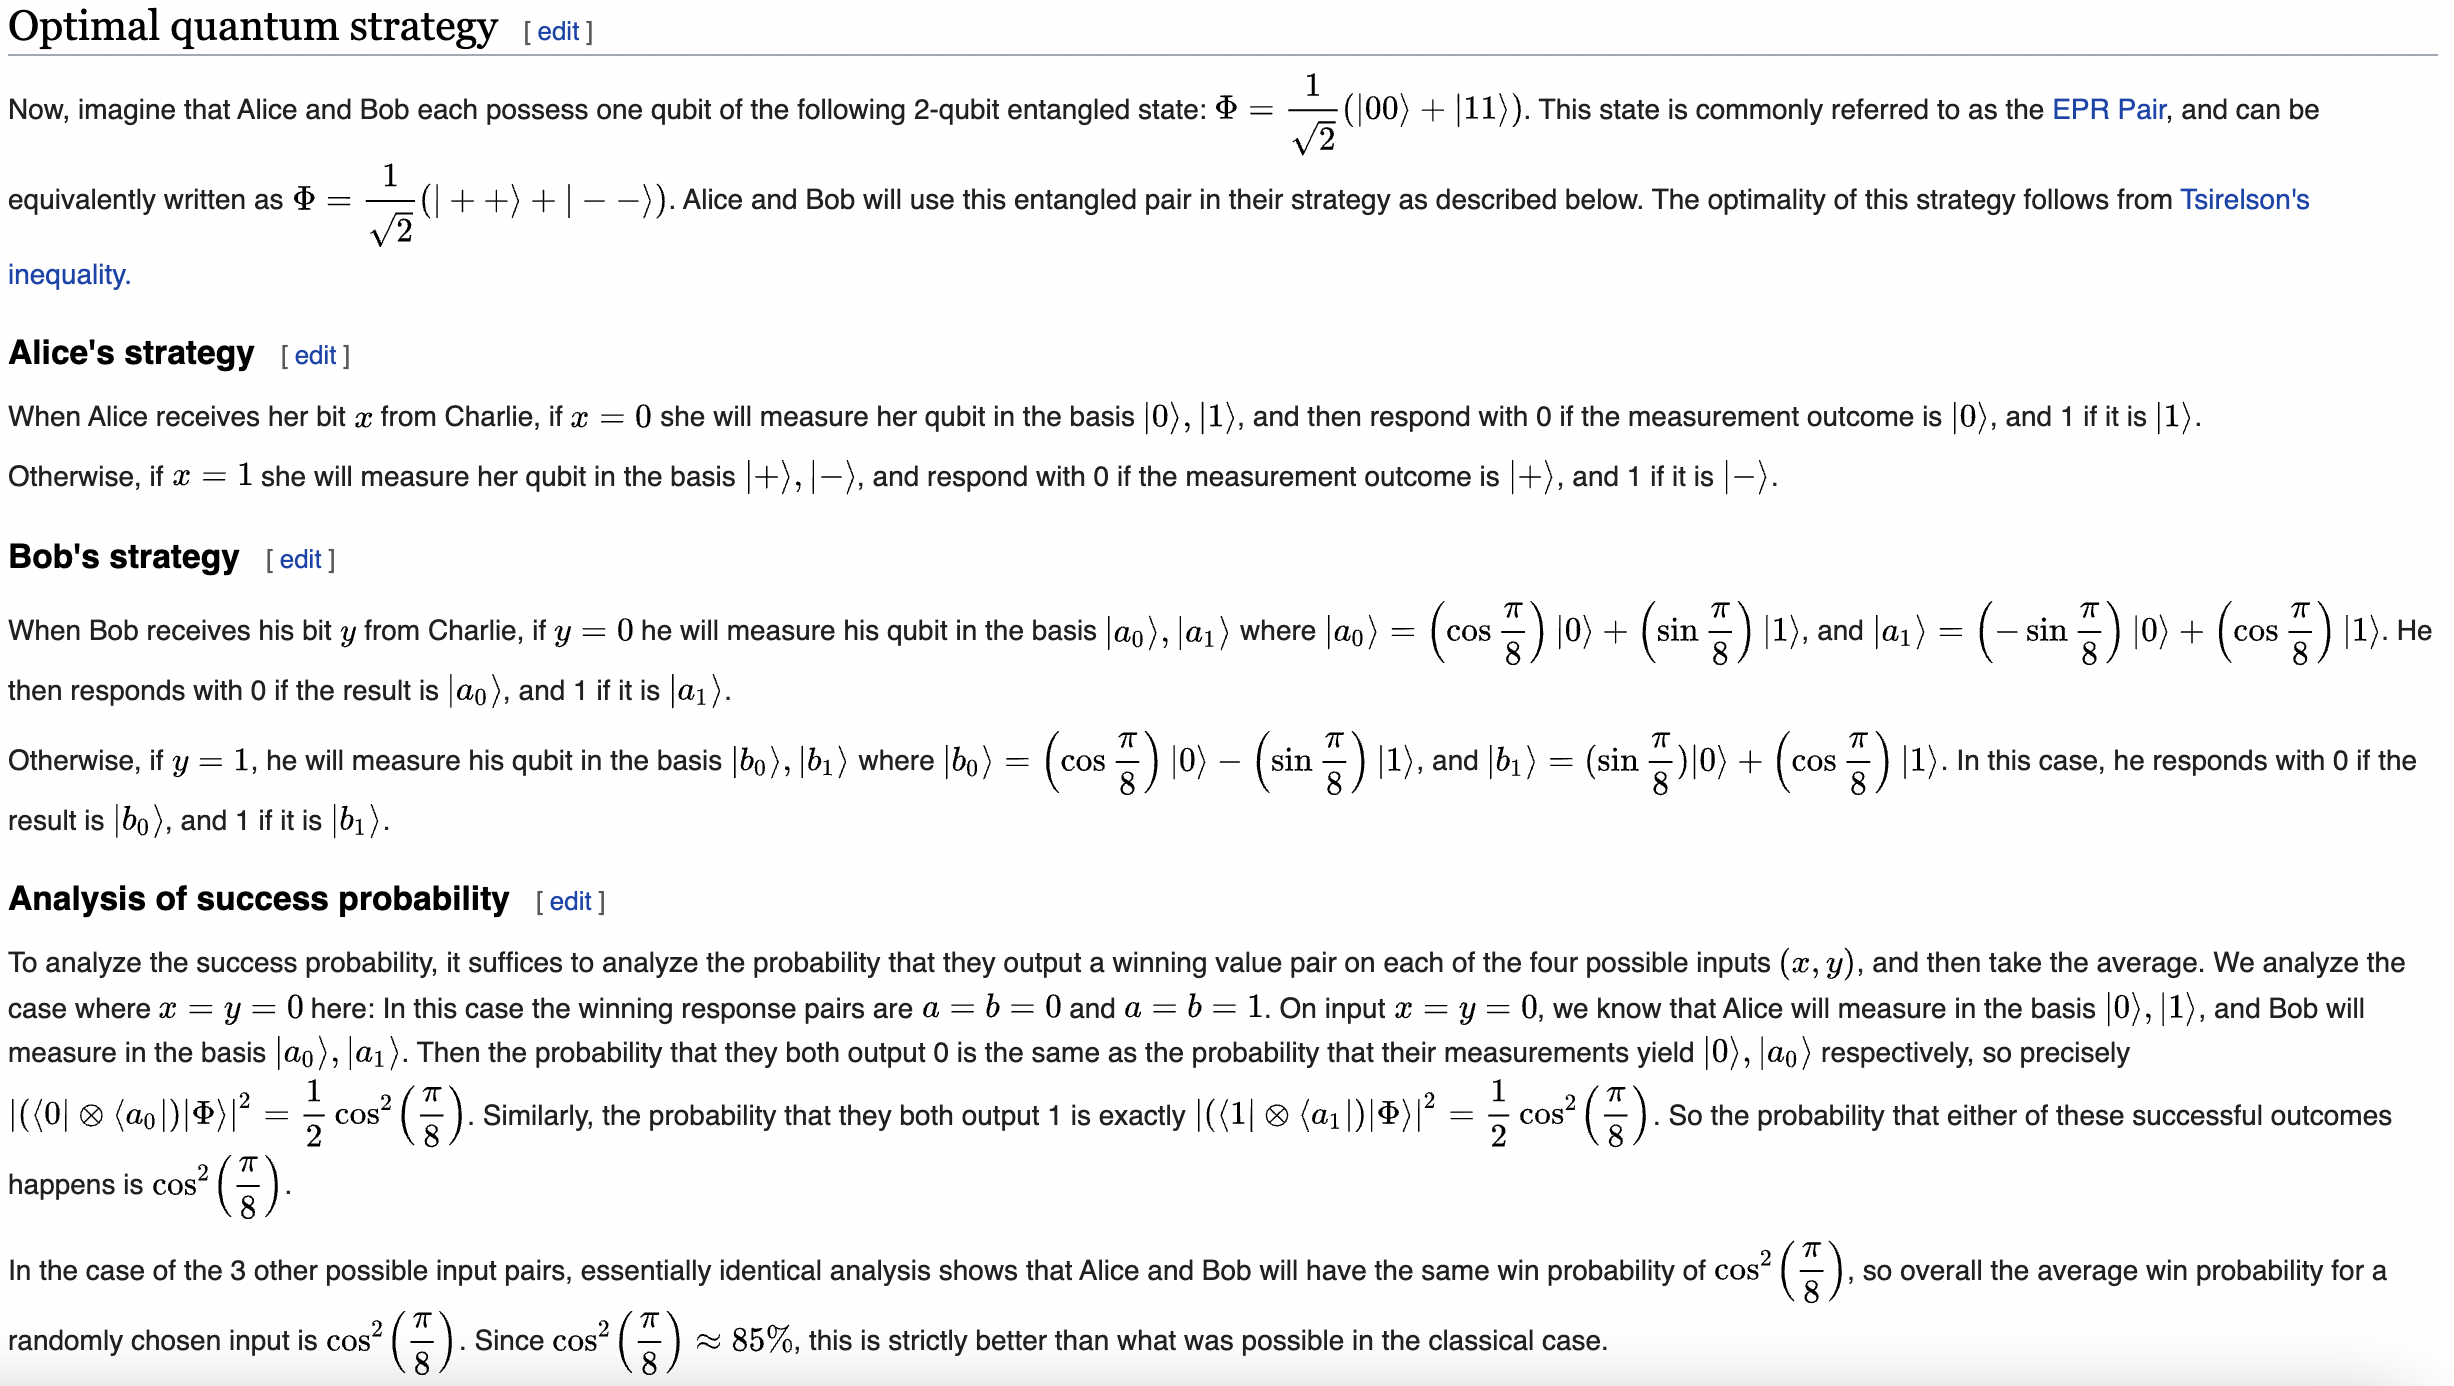

In [11]:
#Prepare the entangled state, EPR Pair
circ = QuantumCircuit(2)
circ.h(0)
circ.cx(0,1)
circ.barrier()
circ.draw()

┌───┐      ░ 
q_0: ┤ H ├──■───░─
     └───┘┌─┴─┐ ░ 
q_1: ─────┤ X ├─░─
          └───┘ ░

In [21]:
#Generate a random x-y pair. Send x to Alice and y to Bob.
x = randint(2, size=1)[0]
y = randint(2, size=1)[0]
print(x,y)

0 0


In [14]:
# Create the X-measurement function for Alice:
def x_measurement(qc, qubit):
    qc.h(qubit) #Hadamard gate is a change of bases gate between Z(0 and 1) and X(+ and -) bases
    return qc

# Create the a0 a1 basis measurement function for Bob:
def a_basis_measurement(qc, qubit):
    qc.u(pi/4, pi, pi, qubit) #Change of bases gate between Z and a0 a1 bases
    return qc

# Create the b0 b1 basis measurement function for Bob:
def b_basis_measurement(qc, qubit):
    qc.u(pi/4, 0, 0, qubit) #Change of bases gate between Z and b0 b1 bases
    return qc

In [22]:
#Write out Alice and Bob's strategies depending on the x,y pair they receive

# Alice measures in the 0 1 basis, Bob measures in a0 a1 basis
if x==0 and y==0: 
  a_basis_measurement(circ, 1) 

# Alice measures in the 0 1 basis, Bob measures in b0 b1 basis
elif x==0 and y==1:
  b_basis_measurement(circ, 1)

# Alice measures in the + - basis, Bob measures in a0 a1 basis
elif x==1 and y==0:
  x_measurement(circ, 0)
  a_basis_measurement(circ, 1)

# Alice measures in the + - basis, Bob measures in b0 b1 basis
elif x==1 and y==1:
  x_measurement(circ, 0)
  b_basis_measurement(circ, 1)

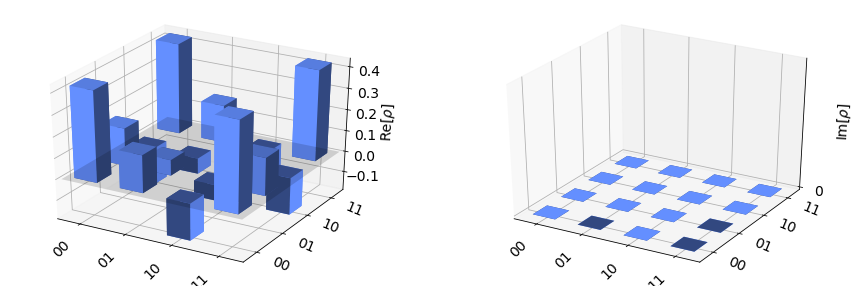

In [23]:
# Visualize the measurements
backend = Aer.get_backend('statevector_simulator')
job = backend.run(circ)
result = job.result()
outputstate = result.get_statevector(circ, decimals=3)
plot_state_city(outputstate)

In [24]:
 # Create a Quantum Circuit
meas = QuantumCircuit(2, 2)
meas.barrier(range(2))
# map the quantum measurement to the classical bits
meas.measure(range(2), range(2))

# The Qiskit circuit object supports composition using
# the addition operator.
circ.add_register(meas.cregs[0])
qc = circ.compose(meas)

#drawing the circuit
qc.draw()

┌───┐      ░                ░ ┌─┐   
q_0: ┤ H ├──■───░────────────────░─┤M├───
     └───┘┌─┴─┐ ░ ┌────────────┐ ░ └╥┘┌─┐
q_1: ─────┤ X ├─░─┤ U(π/4,π,π) ├─░──╫─┤M├
          └───┘ ░ └────────────┘ ░  ║ └╥┘
c: 2/═══════════════════════════════╩══╩═
                                    0  1

In [25]:
# Use Aer's qasm_simulator
backend_sim = Aer.get_backend('qasm_simulator')

# Execute the circuit on the qasm simulator.
# Set the number of repeats of the circuit to 10000
job_sim = backend_sim.run(transpile(qc, backend_sim), shots=10000)

# Grab the results from the job.
result_sim = job_sim.result()

counts = result_sim.get_counts(qc) #gives us the 'ab' pairs
print(counts)

{'01': 721, '11': 4246, '10': 716, '00': 4317}


In [26]:
#Winning strategy is (a,b)=(0,0) or (1,1)
if x==0 and y==0: 
  print((counts.get('00') + counts.get('11'))/10000)

#Winning strategy is (a,b)=(0,0) or (1,1)
elif x==0 and y==1: 
  print((counts.get('00') + counts.get('11'))/10000)

#Winning strategy is (a,b)=(0,0) or (1,1)
elif x==1 and y==0: 
  print((counts.get('00') + counts.get('11'))/10000)

#Winning strategy is (a,b)=(0,1) or (1,0)
elif x==1 and y==1: 
  print((counts.get('01') + counts.get('10'))/10000)

#We'll get 85% as expected

0.8563
